### MEC 2403 - Otimização e Algoritmos para Engenharia Mecanica
#### Aluno: Felipe da Costa Pereira (Mestrado)

#### Lista 3: 

Minimizar a função $f(x_{1}, x_{2}) = x_{1}^2 − 3x_{1}x_{2} + 4x_{2}^2 + x_{1} - x_{2}$  a partir do ponto $x^0 = \{2,2\}^t$, utilizando os seguintes métodos:

1. Univariante 
2. Powell 
3. Steepest Descent 
4. Fletcher–Reeves 
5. Newton–Raphson
6. BFGS

Preencher a tabela abaixo com os resultados obtidos, adotando uma tolerância de $10^−5$ e um número máximo de 3 passos para cada método.   
  
$$
\begin{aligned}
&\begin{array}{|c|c|c|c|c|c|c|}
\hline 
\text{Metodo} & \text{Ponto de minimo} & f(x_{min}) & \text{\# passos} & \alpha_{1} & \alpha_{2} & \alpha_{3} \\
\hline 
Univariante         & ( 1.0938, 1.0625) & 2.2568  & \text{3 (não exato)}    & 0.5000 & -0.9375 & -1.4062 \\
Powell              & ( 2.4320, 1.1900) & 4.1388  & \text{3 (não exato)}    & 0.5000 & -0.9375 & -0.1360 \\
Steepest Descent    & ( 0.4849, 0.3208) & 0.3442  & \text{3 (não exato)}    & 0.1165 & 0.7069 & 0.1165 \\
Fletcher–Reeves     & (-0.7143,-0.1429) & -0.2857 & \text{2 (exato)}        & 0.1165 & 1.2265 & -   \\
Newton–Raphson      & (-0.7143,-0.1429) & -0.2857 & \text{1 (exato)}        & 1      & -      & -   \\
BFGS                & (-0.7143,-0.1429) & -0.2857 & \text{2 (exato)}        & 0.1165 & 1.2265 & -   \\
\hline
\end{array}
\end{aligned}
$$


Notas:   
- Para os métodos de Fletcher-Reeves e BFGS, a solução converge no passo 2, embora $\alpha_{3}$ ainda tenha sido calculado como um valor não nulo, mas $d_{3}$ é um vetor deslocamento muito pequeno. Assim, foi adicionado uma parada pelo critério do $\nabla f(x)$.

___
### Solução:

#### Inicialização e funções auxiliares

$\nabla f(x_{1}, x_{2}) = (2x_{1} - 3 x_{2} + 1, -3 x_{1} + 8 x_{2} - 1)$

$
H = Q = \begin{bmatrix}
2 & -3\\
-3 & 8
\end{bmatrix}
$


Gradiente da função $\nabla f$, matriz da função quadrática $Q$ e $x^0=\{2,2\}^t$

In [171]:
f = @(x) x(1)^2-3*x(1)*x(2)+4*x(2)^2+x(1)-x(2);
grad_f = @(x) [2*x(1)-3*x(2)+1 ; -3*x(1)+8*x(2)-1];
Q = [2 -3;-3 8];
x0 = [2;2];

In [172]:
TOL = 1e-5;

$\alpha^k$: passo <5> do Fletcher-Reeves

$$
\alpha^k = - \frac{\nabla f(x^k)^t d^k}{(d^k)^t Q d^k}
$$


In [173]:
alpha = @(x, d) - (grad_f(x)' * d) / (d' * Q * d);

Função que desenha uma flecha entre 2 pontos

In [174]:
% desenha_flecha = @(A, B) quiver(A(1), A(2), B(1)-A(1), B(2)-A(2), 'LineWidth', 2, 'Color', 'k');
function [] = desenha_flecha(A,B)
    quiver(A(1), A(2), B(1)-A(1), B(2)-A(2), 'LineWidth', 2, 'Color', 'k');
end

Função que plota curvas de nível e pontos

In [175]:
function [] = plot_result(x_)
    n = length(x_);
    x1 = linspace(-1,3,50);
    x2 = linspace(-1,3,50);
    [x1,x2] = meshgrid(x1,x2);
    f_plot = x1.^2 - 3*x1.*x2 + 4*x2.^2 + x1 - x2;    
    figure
    set(gcf,'Position',[0 0 500 500])
    contour(x1, x2, f_plot, 'ShowText','on', [-0.2 1 0:2:10 10:5:30])
    hold on
    for k = 1:n
        plot(x_(:,k)(1), x_(:,k)(2),'o', 'LineWidth', 3, 'MarkerSize', 15)    
        if k<n
            desenha_flecha(x_(:,k)', x_(:,k+1)');
        end    
    end
end

#### 1. Univariante

k=0, x0=(2.0000,2.0000), f=8.000, d=(1,0)
k=1, alpha=0.5000, x=(2.5000,2.0000), f=7.750, d=(0,1)
k=2, alpha=-0.9375, x=(2.5000,1.0625), f=4.234, d=(1,0)
k=3, alpha=-1.4062, x=(1.0938,1.0625), f=2.257, d=(0,1)


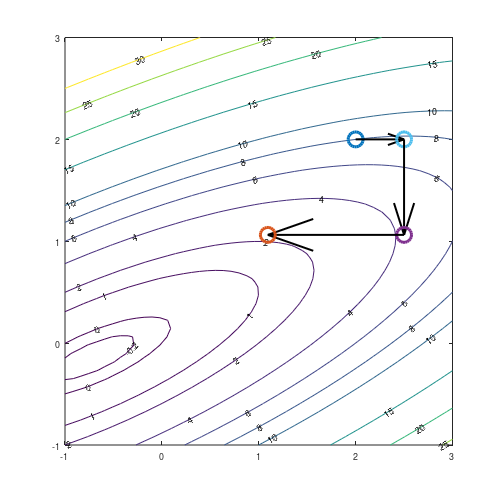

In [176]:
d = [1;0];
fmin = [];
xmin = [];

d_ = [];
x_ = [x0];
f_ = [f(x0)];
x=x0;

fprintf('k=0, x0=(%0.4f,%0.4f), f=%0.3f, d=(%d,%d)\n', x(1), x(2), f(x), d(1), d(2));
for k = 1:3
    d_ = [d_,d]; % storing d
    a = alpha(x,d);
    x = x + a*d; 
    x_ = [x_,x]; %storing x
    f_ = [f_,f(x)]; %storing f
    d = circshift(d,1);
    fprintf('k=%d, alpha=%0.4f, x=(%0.4f,%0.4f), f=%0.3f, d=(%d,%d)\n', k, a, x(1), x(2), f(x), d(1), d(2));

    if norm(grad_f(x)) < TOL
        fprintf('Convergiu em %d steps\n', k);
        break;
    end
end

plot_result(x_)

#### 2. Powell

k=0, x0=(2.0000,2.0000), f=8.000, d=(1,0)
k=1, alpha=0.5000, x=(2.5000,2.0000), f=7.750, d=(0,1)
k=2, alpha=-0.9375, x=(2.5000,1.0625), f=4.234, d=(1,0)
k=3, alpha=-0.1360, x=(2.4320,1.1900), f=4.139, d=(0.5,-0.9375)


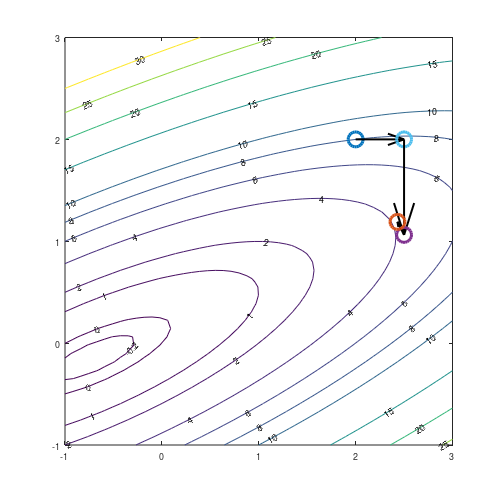

In [177]:
d = [1;0];

d_ = [];
x_ = [x0];
f_ = [f(x0)];
x=x0;

fprintf('k=0, x0=(%0.4f,%0.4f), f=%0.3f, d=(%d,%d)\n', x(1), x(2), f(x), d(1), d(2));
% direções canônicas
for k = 1:2
    d_ = [d_,d]; % storing d
    a = alpha(x,d);
    x = x + a*d; 
    x_ = [x_,x]; %storing x
    f_ = [f_,f(x)]; %storing f
    d = circshift(d,1);
    fprintf('k=%d, alpha=%0.4f, x=(%0.4f,%0.4f), f=%0.3f, d=(%d,%d)\n', k, a, x(1), x(2), f(x), d(1), d(2));

    if norm(grad_f(x)) < TOL
        fprintf('Convergiu em %d steps\n', k);
        break;
    end
end

k=3;
% direção conjugada
d = x-x0;
d_ = [d_,d]; % storing d
a = alpha(x,d);
x = x + a*d; 
x_ = [x_,x]; %storing x
f_ = [f_,f(x)]; %storing f
fprintf('k=%d, alpha=%0.4f, x=(%0.4f,%0.4f), f=%0.3f, d=(%d,%d)\n', k, a, x(1), x(2), f(x), d(1), d(2));

plot_result(x_)

#### 3. Steepest Descent

k=0, x0=(2.0000,2.0000), f=8.000, d=(1,-9)
k=1, alpha=0.1165, x=(2.1165,0.9517), f=3.224, d=(-2.37784,-0.264205)
k=2, alpha=0.7069, x=(0.4356,0.7649), f=1.201, d=(0.423638,-3.81274)
k=3, alpha=0.1165, x=(0.4849,0.3208), f=0.344, d=(-1.00734,-0.111927)


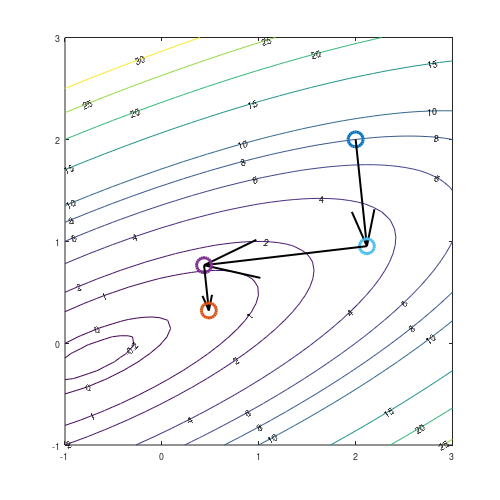

In [178]:
d = -grad_f(x0);

d_ = [];
x_ = [x0];
f_ = [f(x0)];
x=x0;

fprintf('k=0, x0=(%0.4f,%0.4f), f=%0.3f, d=(%d,%d)\n', x(1), x(2), f(x), d(1), d(2));

for k = 1:3
    d_ = [d_,d]; % storing d
    a = alpha(x,d);
    x = x + a*d; 
    x_ = [x_,x]; %storing x
    f_ = [f_,f(x)]; %storing f
    d = -grad_f(x);

    fprintf('k=%d, alpha=%0.4f, x=(%0.4f,%0.4f), f=%0.3f, d=(%d,%d)\n', k, a, x(1), x(2), f(x), d(1), d(2));

    if norm(grad_f(x)) < TOL
        fprintf('Convergiu em %d steps\n', k);
        break;
    end
end

plot_result(x_);

#### 4. Fletcher-Reeves

k=0, x0=(2.0000,2.0000), f=8.000, d=(1,-9)
k=1, alpha=0.1165, x=(2.1165,0.9517), f=3.2244318182, d=(-2.30804,-0.892441)
k=2, alpha=1.2265, x=(-0.7143,-0.1429), f=-0.2857142857, d=(8.88178e-16,-3.10862e-15)
Convergiu em 2 steps


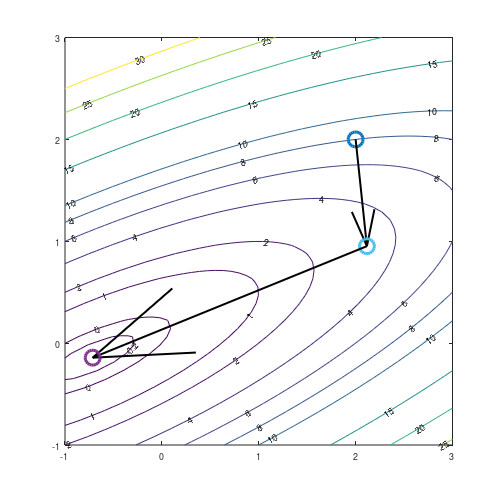

In [179]:
d = -grad_f(x0);

d_ = [];
x_ = [x0];
f_ = [f(x0)];
x=x0;

fprintf('k=0, x0=(%0.4f,%0.4f), f=%0.3f, d=(%d,%d)\n', x(1), x(2), f(x), d(1), d(2));

for k = 1:3
    d_ = [d_,d]; % storing d
    
    a = alpha(x,d); % <5>
    xk = x;
    x = x + a*d;    % <6>
    xk_1 = x;

    x_ = [x_,x]; %storing x
    f_ = [f_,f(x)]; %storing f

    b = (grad_f(xk_1)' * grad_f(xk_1)) / (grad_f(xk)' * grad_f(xk)); % <9>
    d = -grad_f(xk_1) + b * d;  % <10>
    
    fprintf('k=%d, alpha=%0.4f, x=(%0.4f,%0.4f), f=%0.10f, d=(%d,%d)\n', k, a, x(1), x(2), f(x), d(1), d(2));

    if norm(grad_f(x)) < TOL
        fprintf('Convergiu em %d steps\n', k);
        break;
    end
end

plot_result(x_);

#### 5. Newton-Raphson

k=0, x0=(2.0000,2.0000), f=8.000, d=(-2.71429,-2.14286)
k=1, alpha=1.0000, x=(-0.7143,-0.1429), f=-0.285714, d=(-2.71429,-2.14286)
Convergiu em 1 steps


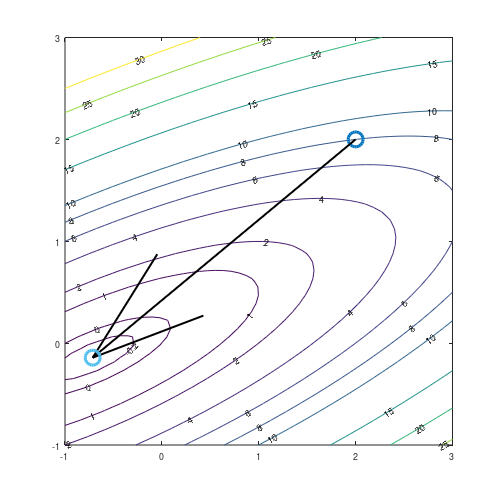

In [180]:
d = -inv(Q) * grad_f(x0);

d_ = [];
x_ = [x0];
f_ = [f(x0)];
x=x0;

fprintf('k=0, x0=(%0.4f,%0.4f), f=%0.3f, d=(%d,%d)\n', x(1), x(2), f(x), d(1), d(2));
for k = 1:3
    d_ = [d_,d]; % storing d
    a = alpha(x,d);
    x = x + a*d; 
    x_ = [x_,x]; %storing x
    f_ = [f_,f(x)]; %storing f
    d = -inv(Q) * grad_f(x0);
    fprintf('k=%d, alpha=%0.4f, x=(%0.4f,%0.4f), f=%0.6f, d=(%d,%d)\n', k, a, x(1), x(2), f(x), d(1), d(2));

    if norm(grad_f(x)) < TOL
        fprintf('Convergiu em %d steps\n', k);
        break;
    end
end

plot_result(x_)

#### 6. BFGS

k=0, x0=(2.0000,2.0000), f=8.000, d=(1,-9)
k=1, alpha=0.1165, x=(2.1165,0.9517), f=3.224432, d=(-2.30804,-0.892441)
k=2, alpha=1.2265, x=(-0.7143,-0.1429), f=-0.285714, d=(-3.17207e-16,-6.34413e-17)
Convergiu em 2 steps


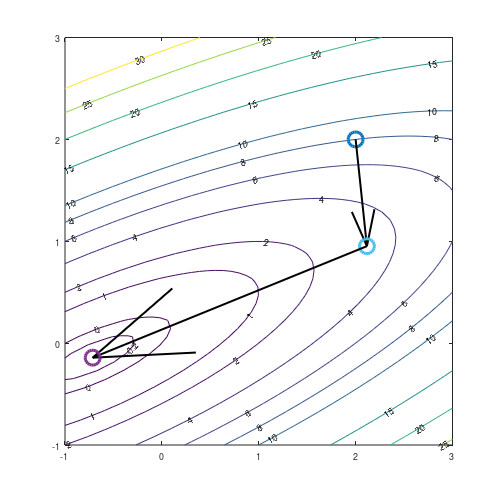

In [181]:
S0 = eye(2);

d_ = [];
x_ = [x0];
f_ = [f(x0)];
x=x0;
S=S0;

d = -S * grad_f(x);
fprintf('k=0, x0=(%0.4f,%0.4f), f=%0.3f, d=(%d,%d)\n', x(1), x(2), f(x), d(1), d(2));

for k = 1:3
    d_ = [d_,d]; % storing d
    
    a = alpha(x,d);

    xk = x;
    x = x + a*d;    % <5>
    xk1 = x;

    dxk = xk1 - xk;
    dgk = grad_f(xk1) - grad_f(xk);
 
    x_ = [x_,x]; %storing x
    f_ = [f_,f(x)]; %storing f

    S = S + ((dxk'*dgk + dgk'*S*dgk)*dxk*dxk')/((dxk'*dgk)^2) - (S*dgk*dxk' + dxk*(S*dgk)')/(dxk'*dgk);
    d = -S * grad_f(x);

    fprintf('k=%d, alpha=%0.4f, x=(%0.4f,%0.4f), f=%0.6f, d=(%d,%d)\n', k, a, x(1), x(2), f(x), d(1), d(2));

    if norm(grad_f(x)) < TOL
        fprintf('Convergiu em %d steps\n', k);
        break;
    end
end

plot_result(x_)

#### Quadro Resumo

$$
\begin{aligned}
&\begin{array}{|c|c|c|c|c|c|c|}
\hline 
\text{Metodo} & \text{Ponto de minimo} & f(x_{min}) & \text{\# passos} & \alpha_{1} & \alpha_{2} & \alpha_{3} \\
\hline 
Univariante         & ( 1.0938, 1.0625) & 2.2568  & \text{3 (não exato)}    & 0.5000 & -0.9375 & -1.4062 \\
Powell              & ( 2.4320, 1.1900) & 4.1388  & \text{3 (não exato)}    & 0.5000 & -0.9375 & -0.1360 \\
Steepest Descent    & ( 0.4849, 0.3208) & 0.3442  & \text{3 (não exato)}    & 0.1165 & 0.7069 & 0.1165 \\
Fletcher–Reeves     & (-0.7143,-0.1429) & -0.2857 & \text{2 (exato)}        & 0.1165 & 1.2265 & - \\
Newton–Raphson      & (-0.7143,-0.1429) & -0.2857 & \text{1 (exato)}        & 1      & -      & - \\
BFGS                & (-0.7143,-0.1429) & -0.2857 & \text{2 (exato)}        & 0.1165 & 1.2265 & - \\
\hline
\end{array}
\end{aligned}
$$



Notas:   
- Para os métodos de Fletcher-Reeves e BFGS, a solução converge no passo 2, embora $\alpha_{3}$ ainda tenha sido calculado como um valor não nulo, mas $d_{3}$ é um vetor deslocamento muito pequeno. Assim, foi adicionado uma parada pelo critério do $\nabla f(x)$.
